## Exploratory Data Analysis of KickStarter Projects

Here is some brief exploratory data analysis of KickStarter project data.     
I mainly focus on seeing trends in the number of launched project in different categories.     
Dataset was downloaded from the following URL.     

https://www.kaggle.com/kemical/kickstarter-projects


## Libraries

In [1]:
library(tidyverse)
theme_set(theme_light())
library(lubridate)
options(warn = F)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



## Dataset

In [2]:
ks <- read.csv("./data/ks-projects-201801.csv")

#check the structure
glimpse(ks)

Observations: 378,661
Variables: 15
$ ID               <int> 1000002330, 1000003930, 1000004038, 1000007540, 10...
$ name             <fct> The Songs of Adelaide & Abullah, Greeting From Ear...
$ category         <fct> Poetry, Narrative Film, Narrative Film, Music, Fil...
$ main_category    <fct> Publishing, Film & Video, Film & Video, Music, Fil...
$ currency         <fct> GBP, USD, USD, USD, USD, USD, USD, USD, USD, USD, ...
$ deadline         <fct> 2015-10-09, 2017-11-01, 2013-02-26, 2012-04-16, 20...
$ goal             <dbl> 1000, 30000, 45000, 5000, 19500, 50000, 1000, 2500...
$ launched         <fct> 2015-08-11 12:12:28, 2017-09-02 04:43:57, 2013-01-...
$ pledged          <dbl> 0.00, 2421.00, 220.00, 1.00, 1283.00, 52375.00, 12...
$ state            <fct> failed, failed, failed, failed, canceled, successf...
$ backers          <int> 0, 15, 3, 1, 14, 224, 16, 40, 58, 43, 0, 100, 0, 0...
$ country          <fct> GB, US, US, US, US, US, US, US, US, US, CA, US, US...
$ usd.pledged   

## Modify Data Type and add columns



There are 378,661 rows with 15 variables.     
Looks like "launched" and "deadline" are stored as factor data type.     
They should be converted to Date data type.     
Also, let's add month and year columns for easy aggregating.     



In [3]:
# change launched and deadline columns to Date type

ks$launched <- as.Date(ymd_hms(ks$launched))
ks$deadline <- as.Date(ymd(ks$deadline))

# add month and year columns

ks$month <- as.Date(paste0(substr(as.character(ks$launched),1,8),"01"))
ks$year <- as.factor(year(ks$month))

#check the structure again
glimpse(ks)

Observations: 378,661
Variables: 17
$ ID               <int> 1000002330, 1000003930, 1000004038, 1000007540, 10...
$ name             <fct> The Songs of Adelaide & Abullah, Greeting From Ear...
$ category         <fct> Poetry, Narrative Film, Narrative Film, Music, Fil...
$ main_category    <fct> Publishing, Film & Video, Film & Video, Music, Fil...
$ currency         <fct> GBP, USD, USD, USD, USD, USD, USD, USD, USD, USD, ...
$ deadline         <date> 2015-10-09, 2017-11-01, 2013-02-26, 2012-04-16, 2...
$ goal             <dbl> 1000, 30000, 45000, 5000, 19500, 50000, 1000, 2500...
$ launched         <date> 2015-08-11, 2017-09-02, 2013-01-12, 2012-03-17, 2...
$ pledged          <dbl> 0.00, 2421.00, 220.00, 1.00, 1283.00, 52375.00, 12...
$ state            <fct> failed, failed, failed, failed, canceled, successf...
$ backers          <int> 0, 15, 3, 1, 14, 224, 16, 40, 58, 43, 0, 100, 0, 0...
$ country          <fct> GB, US, US, US, US, US, US, US, US, US, CA, US, US...
$ usd.pledged   

## Inspect the data

There are several columns we want to check what is in there, or how is the the distribution like.     
I'm going to start with "main_category" column.

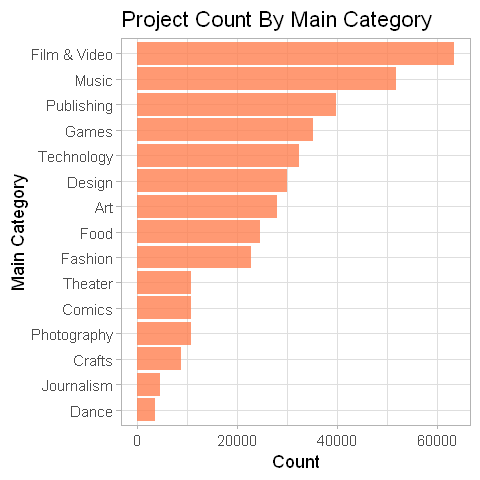

In [4]:
# set plot size
options(repr.plot.width=4, repr.plot.height=4)

ks %>% 
  group_by(main_category) %>%
  summarise(count = n()) %>%
  ggplot(aes(x = reorder(main_category, count), y = count)) +
  geom_bar(stat = "identity", fill = "coral", alpha = 0.8) + 
  labs(title = "Project Count By Main Category", x = "Main Category", y = "Count") + 
  coord_flip() 


There are 15 main categories.     
The main category with the most number is "Film & Video", which has over 60,000 projects.     
And the next most is "Music", which has over 50,000 projects.    


Next, I'm going to see "country".    

In [5]:
# showing data table
ks %>%
  group_by(country) %>%
  summarise(count = n()) %>%
  arrange(-count) %>%
  t()

country,US,GB,CA,AU,DE,"N,0""",FR,IT,NL,ES,...,DK,IE,CH,NO,HK,BE,AT,SG,LU,JP
count,292627,33672,14756,7839,4171,3797,2939,2878,2868,2276,...,1113,811,761,708,618,617,597,555,62,40


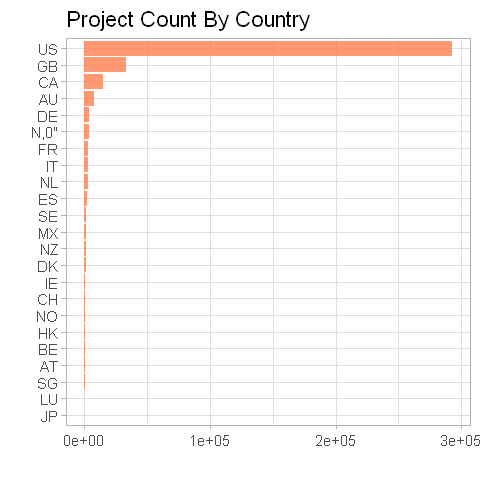

In [6]:
# set plot size
options(repr.plot.width=4, repr.plot.height=4)

ks %>% 
  group_by(country) %>%
  summarise(count = n()) %>%
  ggplot(aes(x = reorder(country, count), y=count)) +
  geom_bar(stat = "identity", fill = "coral", alpha = 0.8) + 
  labs(title = "Project Count By Country", x="", y="") + 
  coord_flip()

It looks like 292,627 projects, which is about 77% of total is "US" project.    
Next, I'm going to check launch date.    
    

In [7]:
# showing data table
ks %>% 
  group_by(year) %>%
  summarise(count = n()) %>%
  t()

year,1970,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,7,1329,10519,26237,41165,44851,67745,77300,57184,52200,124


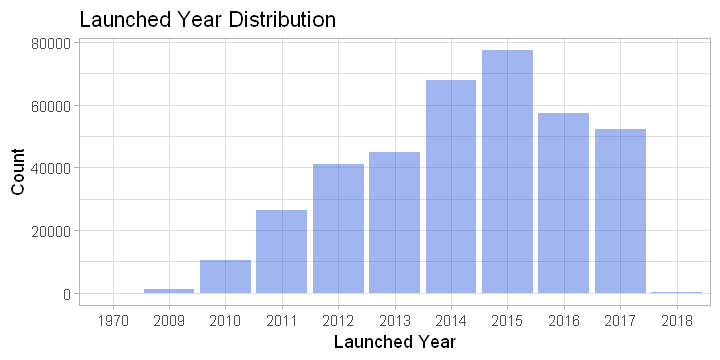

In [8]:
# set plot size
options(repr.plot.width=6, repr.plot.height=3)

ks %>% 
  group_by(year) %>%
  summarise(count = n()) %>%
  ggplot(aes(year, count)) +
  geom_bar(stat = "identity", fill = "royal blue", alpha = 0.5) + 
  labs(title = "Launched Year Distribution", x = "Launched Year", y = "Count")

Some launch date are 1970, which is obviously wrong.    
Also, we see only 124 data for 2018, as 2018 is still ongoing (at least when the data is obtained).    
Since these numbers are small, we can just drop 1970 and 2018, and keep 2009-2017 data.     


Next, let's check "state" column which shows the result of the project.

In [9]:
# showing data table
ks %>% 
  group_by(state) %>%
  summarise(count = n()) %>%
  arrange(-count) %>%
  t()

state,failed,successful,canceled,undefined,live,suspended
count,197719,133956,38779,3562,2799,1846


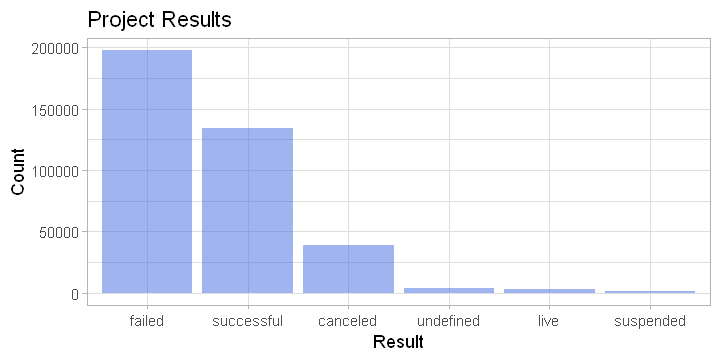

In [10]:
# set plot size
options(repr.plot.width=6, repr.plot.height=3)

ks %>% 
  group_by(state) %>%
  summarise(count = n()) %>%
  ggplot(aes(reorder(state,desc(count)), count)) +
  geom_bar(stat = "identity", fill = "royal blue", alpha = 0.5) + 
  labs(title = "Project Results", x = "Result", y = "Count")

We see relatively small numbers of "undifined", "live" and "suspended" projects.      
We can also drop these data and keep only "successful", "failed" and "canceled" result status.


## Drop data

Here, I'm going to drop some projects and keep those with launch date during 2009-2017 only.       
Also going to keep those with results "failed", "successful", and "canceled" only and stored in ks_clean data frame.    


In [11]:
ks_clean <- ks %>%
  filter(year %in% c("2009","2010","2011","2012","2013","2014","2015","2016","2017")) %>%
  filter(state %in% c("failed","successful","canceled"))

ks_clean$year <- factor(ks_clean$year, levels = c("2009","2010","2011","2012","2013","2014","2015","2016","2017"))
ks_clean$state <- factor(ks_clean$state, levels = c("successful","failed","canceled"))

Now the data is cleaner.

## Trends


As we've seen above launch date inspection, the number of projects increased from 2009 to 2015, then turned downward.      
More specifically, the number jumped in 2014 and dropped in 2016.    
By creating a cross table and facet chart, I'm going to check this by project result.

In [12]:
# showing data table
ks_clean %>% 
  group_by(state,year) %>%
  summarise(count = n()) %>%
  spread(year,count) %>%
  arrange(state)

state,2009,2010,2011,2012,2013,2014,2015,2016,2017
successful,579,4593,12171,17892,19415,21107,20971,18766,18462
failed,600,4984,11878,20588,21686,38199,44301,30526,24957
canceled,150,926,2144,2631,3690,7418,8927,7119,5766


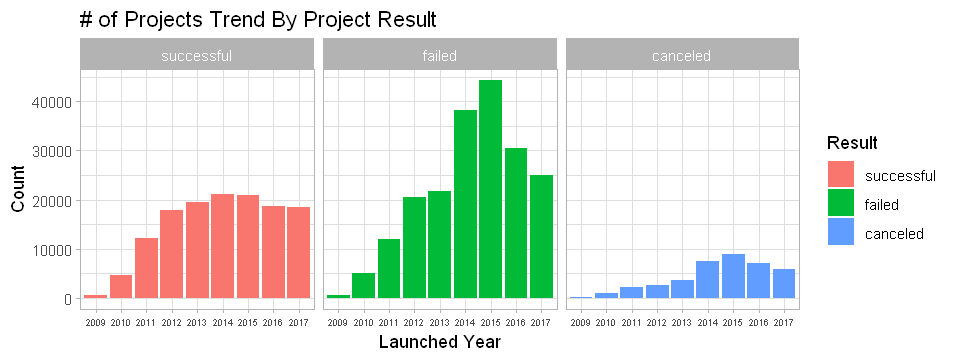

In [13]:
# set plot size
options(repr.plot.width=8, repr.plot.height=3)

ks_clean %>% 
  group_by(state,year) %>%
  summarise(count = n()) %>%
  ggplot(aes(year, count, fill = state)) +
  geom_bar(stat = "identity") + 
  facet_wrap(~state, nrow=1) +
  labs(title = "# of Projects Trend By Project Result", x = "Launched Year", y = "Count") +
  scale_fill_discrete(name = "Result") +
  theme(axis.text.x = element_text(size=rel(0.6)))

Here, we see the trend is mostly driven by failed projects.    
In other words, the number of projects jumped up in 2014 and 2015, but many of them failed in funding.     

The number of failed projects jumped from 21,686 to 38,199 in 2014 and dropped from 44,301 to 30,526 in 2016.     
The number of successful and canceled projects are more moderately went up and down.     

Let's break down this by main category and see the trend for each of them.    

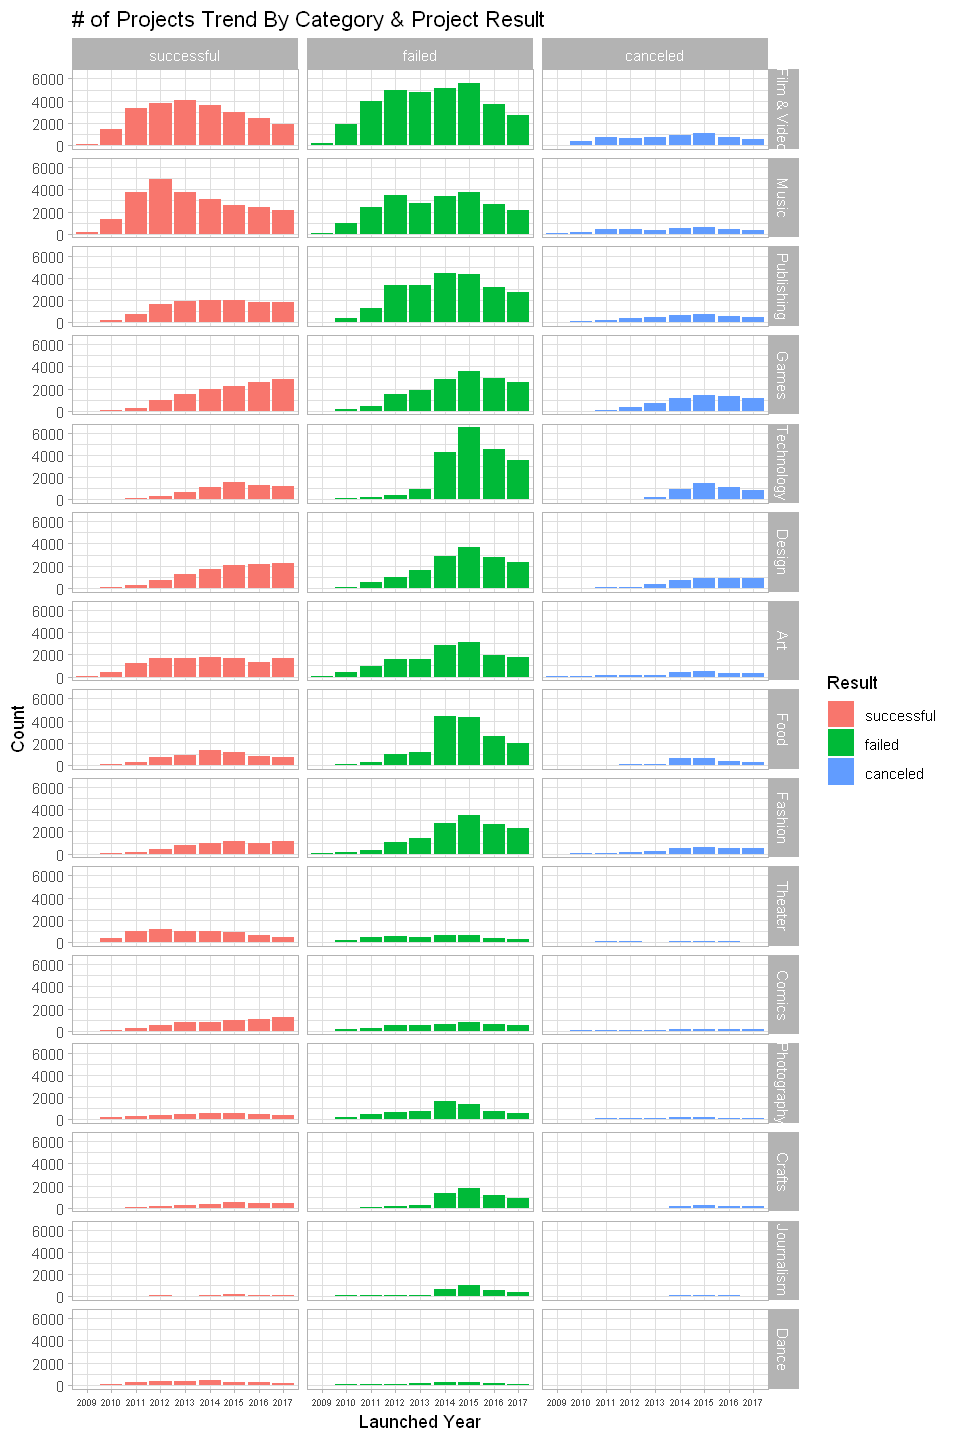

In [14]:
# set plot size
options(repr.plot.width=8, repr.plot.height=12)

ks_clean %>% 
  group_by(state,year,main_category) %>%
  summarise(count = n()) %>%
  ggplot(aes(year, count, fill = state)) +
  geom_bar(stat = "identity") + 
  facet_grid(reorder(main_category,-count)~state) +
  scale_fill_discrete(name = "Result") +
  labs(title = "# of Projects Trend By Category & Project Result", x = "Launched Year", y = "Count")  +
  theme(axis.text.x = element_text(size=rel(0.6)))

Here is brief conclusion so far regarding the number of projects.      

In some of the top categories like "Film&Video" or "Music", number of successful projects is decreasing after the peak in 2012 or 2013.     
However in categories like "Games" or "Design", the number is increasing.     


The number of failed projects jumped up in 2014 in categories like "Technology" or "Food".     
In most of the top categories, the number of failed projects is decreasing after 2014-2015.     
      
In 2014 and 2015, there were lots of projects launched and failed in most categories.    
So, we can assume that the success rate dropped during this time.


## Success Rate

As a last step, let's check the success rate for the top five main categories.     

In [15]:
# get top 5 categories
top_cat <- 
ks_clean %>% 
  group_by(main_category) %>%
  summarise(count = n()) %>%
  arrange(desc(count))%>%
  select(main_category) %>%
  head(5)

top_cat

main_category
Film & Video
Music
Publishing
Games
Technology


In [16]:
# showing data table
ks_clean %>% 
  group_by(main_category,year) %>%
  inner_join(top_cat, by = "main_category") %>%
  summarise(success_rate = sum(case_when(state == "successful" ~ 1, TRUE ~ 0)) / n())%>%
  spread(year, success_rate)

main_category,2009,2010,2011,2012,2013,2014,2015,2016,2017
Film & Video,0.3768997,0.3998371,0.4147287,0.4015547,0.4229921,0.3715289,0.3111019,0.3510669,0.3684211
Games,0.5000000,0.3004292,0.3550000,0.3389769,0.3649277,0.3318281,0.3091108,0.3755433,0.4361896
Music,0.5322034,0.5255682,0.5696337,0.5582026,0.5465352,0.4450612,0.3722024,0.4382246,0.4617235
Publishing,0.4418605,0.3153409,0.3364403,0.3065844,0.3363793,0.2844852,0.2791454,0.3310654,0.3633979
Technology,0.3166667,0.2927928,0.3076923,0.4047323,0.3700441,0.1786217,0.1675913,0.1886547,0.2101646


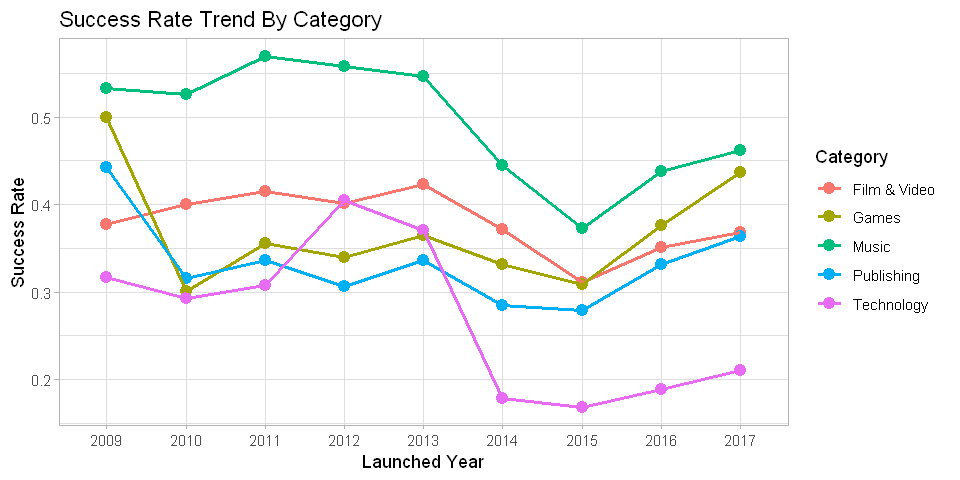

In [17]:
# set plot size
options(repr.plot.width=8, repr.plot.height=4)

ks_clean %>% 
  group_by(main_category, year) %>%
  inner_join(top_cat, by = "main_category") %>%
  summarise(success_rate = sum(case_when(state == "successful" ~ 1, TRUE ~ 0)) / n())%>%
  #spread(year, success_rate) %>%
  ggplot(aes(year,success_rate, color = main_category)) + 
  geom_point(size = 3) + 
  geom_line(aes(group = main_category), size = 1) +
  scale_color_discrete(name = "Category") +
  labs(title = "Success Rate Trend By Category", x = "Launched Year", y = "Success Rate")

We can confirm the drop in 2014 and 2015 here.    
Also, we see some trends from different angle.   

Technology projects have way lower success rate from other categories.    
Music projects have always had the highest success rate, and it was over 50% until 2014.    
Game projects have had constant success rate 30-40% during 2010-2016 period.
